In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits 
import astropy.units as u
import astropy.constants as const

import ipyaladin.aladin_widget as ipyal

# Stellar Spectroscopy

## Abstract

The following survey represents stellar spectroscopy. The reader could find an explanation on how to find different properties of stars. There are also  code implementations of function that find those properties. 

## Intro

Stellar spectroscopy is the study of astronomy using the techniques of spectroscopy to measure the spectrum of electromagnetic radiation, including visible light, ultraviolet, X-ray, infrared and radio waves that radiate from stars and other celestial objects. A stellar spectrum can reveal many properties of stars, such as their temperature, density, mass, distance and luminosity. Spectroscopy can show the velocity of motion towards or away from the observer by measuring the Doppler shift. It is also used to study the physical properties of many other types of celestial objects such as planets, nebulae, galaxies, and active galactic nuclei.

## Background

Astronomical spectroscopy is used to measure three major bands of radiation in the electromagnetic spectrum: visible light, radio waves, and X-rays. While all spectroscopy looks at specific bands of the spectrum, different methods are required to acquire the signal depending on the frequency. Ozone (O3) and molecular oxygen (O2) absorb light with wavelengths under 300 nm, meaning that X-ray and ultraviolet spectroscopy require the use of a satellite telescope or rocket mounted detectors.  Radio signals have much longer wavelengths than optical signals, and require the use of antennas or radio dishes. Infrared light is absorbed by atmospheric water and carbon dioxide, so while the equipment is similar to that used in optical spectroscopy, satellites are required to record much of the infrared spectrum.


### Optical spectrocopy

Physicists have been looking at the solar spectrum since Isaac Newton first used a simple prism to observe the refractive properties of light. In the early 1800s Joseph von Fraunhofer used his skills as a glassmaker to create very pure prisms, which allowed him to observe 574 dark lines in a seemingly continuous spectrum. Soon after this, he combined telescope and prism to observe the spectrum of Venus, the Moon, Mars, and various stars such as Betelgeuse; his company continued to manufacture and sell high-quality refracting telescopes based on his original designs until its closure in 1884.

The resolution of a prism is limited by its size; a larger prism will provide a more detailed spectrum, but the increase in mass makes it unsuitable for highly detailed work. This issue was resolved in the early 1900s with the development of high-quality reflection gratings by J.S. Plaskett at the Dominion Observatory in Ottawa, Canada.  Light striking a mirror will reflect at the same angle, however a small portion of the light will be refracted at a different angle; this is dependent upon the indices of refraction of the materials and the wavelength of the light. By creating a "blazed" grating which utilizes a large number of parallel mirrors, the small portion of light can be focused and visualized. These new spectroscopes were more detailed than a prism, required less light, and could be focused on a specific region of the spectrum by tilting the grating.

The limitation to a blazed grating is the width of the mirrors, which can only be ground a finite amount before focus is lost; the maximum is around 1000 lines/mm. In order to overcome this limitation holographic gratings were developed. Volume phase holographic gratings use a thin film of dichromated gelatin on a glass surface, which is subsequently exposed to a wave pattern created by an interferometer. This wave pattern sets up a reflection pattern similar to the blazed gratings but utilizing Bragg diffraction, a process where the angle of reflection is dependent on the arrangement of the atoms in the gelatin. The holographic gratings can have up to 6000 lines/mm and can be up to twice as efficient in collecting light as blazed gratings. Because they are sealed between two sheets of glass, the holographic gratings are very versatile, potentially lasting decades before needing replacement.

Light dispersed by the grating or prism in a spectrograph can be recorded by a detector. Historically, photographic plates were widely used to record spectra until electronic detectors were developed, and today optical spectrographs most often employ charge-coupled devices (CCDs). The wavelength scale of a spectrum can be calibrated by observing the spectrum of emission lines of known wavelength from a gas-discharge lamp. The flux scale of a spectrum can be calibrated as a function of wavelength by comparison with an observation of a standard star with corrections for atmospheric absorption of light; this is known as spectrophotometry.


### Radio spectroscopy

Radio astronomy was founded with the work of Karl Jansky in the early 1930s, while working for Bell Labs. He built a radio antenna to look at potential sources of interference for transatlantic radio transmissions. One of the sources of noise discovered came not from Earth, but from the center of the Milky Way, in the constellation Sagittarius. In 1942, JS Hey captured the sun's radio frequency using military radar receivers.  Radio spectroscopy started with the discovery of the 21-centimeter H I line in 1951.

## Reading spectrum

In [ ]:
def read_spec(filename):
    '''Read a spectrum from the MILES library

    Parameters
    ----------
    filename : string
       name of the fits file with the data

    Returns
    -------
    wavelength : np.ndarray
        wavelength (in Ang)
    flux : np.ndarray
        flux (in erg/s/cm**2)
    date_obs : string
        time of observation
    '''
    
    sp = fits.open(filename)
    data = sp[0].data
    header = sp[0].header
    obj_name = header.get('OBJECT', 'Unknown')

    flux = data[0]
    
    wcs = WCS(header, naxis=1, relax=False, fix=False)
    wavelength = wcs.wcs_pix2world(np.arange(len(flux)), 0)[0]

    date_obs = header.get('DATE_OBSERVATION', 'Unknown')
    return sp, wavelength, flux, date_obs


sp, wavelength, flux, date_obs = read_spec('data/s0003.fits')

WIEN_DISPLACEMENT_CONSTANT = 2.9 * 10**7
STEFAN_BOLTZMAN_CONSTANT = 5.67 * 10 ** -8

## Stars and their properties

### Temperature

In 1860 Gustav Kirchhoff proposed the idea of a black body, a material that emits electromagnetic radiation at all wavelengths. In 1894 Wilhelm Wien derived an expression relating the temperature (T) of a black body to its peak emission wavelength ($\lambda_{\text{max}}$).

$$ \lambda_{\text{max}}T = b $$

$b$ is a constant of proportionality called Wien's displacement constant, equal to 2.897771955...×10−3 m⋅K. This equation is called Wien's Law. By measuring the peak wavelength of a star, the surface temperature can be determined. For example, if the peak wavelength of a star is 502 nm the corresponding temperature will be 5778 kelvins.

In [13]:
def find_temperature(wavelength):
    '''
    Finds temperature of star by using its wavelength

    Args:
        wavelength: numpy.ndarray (in Ang)
    Returns:
        temperature: The temperature of the star (in Kelvin)
    '''
    
    wavelength_in_nanometers = wavelength * 10
    
    temperature = WIEN_DISPLACEMENT_CONSTANT / (np.max(wavelength_in_nanometers) * 10)

    return temperature

find_temperature([10, 502])

5776.892430278885

### Luminosity and size

The luminosity of a star is a measure of the electromagnetic energy output in a given amount of time. Luminosity (L) can be related to the temperature (T) of a star by

$$ L = 4\pi R^2\sigma T^4 $$

where $\text{R}$ is the radius of the star and $\sigma$ is the Stefan–Boltzmann constant, with a value of 5.670374419...×10−8 W⋅m−2⋅K−4. Thus, when both luminosity and temperature are known (via direct measurement and calculation) the radius of a star can be determined.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Black_body.svg/640px-Black_body.svg.png?1656013480212)

Image source: [https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Black_body.svg/640px-Black_body.svg.png?1656013480212](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Black_body.svg/640px-Black_body.svg.png?1656013480212)

In [14]:
def find_luminosity(wavelength, radius, temperature=None):
    '''
    Finds luminosity of star by using its wavelength

    Args:
        wavelength: numpy.ndarray (in Ang)
        radius: float - The radius of the star
        temperature: float | None - The temperature of the star, if none, it will be calculated
    Returns:
        luminosity: The luminosity of the star (in Watts)
    '''

    if temperature is None:
        temperature = find_temperature(wavelength)

    star_surface = 4 * np.pi * radius ** 2
    luminosity_per_square_meter = STEFAN_BOLTZMAN_CONSTANT * temperature ** 4

    return star_surface * luminosity_per_square_meter


### Chemical properties

Every chemical element — and combination of elements — has a unique fingerprint that astronomers can look for in the spectrum of a given object. Identifying those fingerprints allows researchers to determine what it is made of.
That fingerprint often appears as the absorption of light. Isaac Newton has first discovered that the white light is complicated, created by different monochromatic rays, i. e. it contains all colors. From the whole electromagnetic spectrum, the human eye sees only a small part in the interval from 390 to 780 nm. in which we differ 8 color areas:

* From 390 to 450 nm - violet
* From 450 to 480 nm - blue
* From 480 to 510 nm - blue-green
* From 510 to 530 nm - green
* From 530 to 575 nm - yellow-green
* From 575 to 585 nm - yellow
* From 585 to 620 nm - orange
* From 620 to 780 nm - red 

In the interval from 10 to 380 nm are the invisble for us UV rays and above the red area from 780 nm to 1 mm are the also invisible for us IR rays.

![](light-spectrum.png)

Image source: [https://www.istockphoto.com/vector/visible-spectrum-light-infographic-of-sunlight-wavelength-vector-gm1226932486-361668815](https://www.istockphoto.com/vector/visible-spectrum-light-infographic-of-sunlight-wavelength-vector-gm1226932486-361668815)

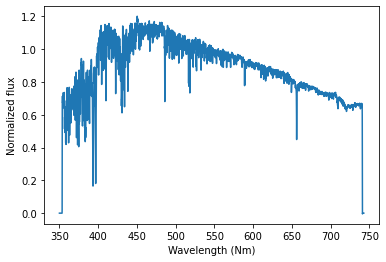

In [20]:
def plot_wavelength(wavelength, flux):

    plt.plot(wavelength / 10, flux)
    plt.xlabel('Wavelength (Nm)')
    plt.ylabel('Normalized flux')

    plt.show()
    
plot_wavelength(wavelength, flux)

Every atom has electrons, and these electrons like to stay in their lowest-energy configuration. But when photons carrying energy hit an electron, they can boost it to higher energy levels. This is absorption, and each element’s electrons absorb light at specific wavelengths (i.e., energies) related to the difference between energy levels in that atom. But the electrons want to return to their original levels, so they don’t hold onto the energy for long. When they emit the energy, they release photons with exactly the same wavelengths of light that were absorbed in the first place. An electron can release this light in any direction, so most of the light is emitted in directions away from our line of sight. Therefore, a dark line appears in the spectrum at that particular wavelength. 

Because the wavelengths at which absorption lines occur are unique for each element, astronomers can measure the position of the lines to determine which elements are present in a target. The amount of light that is absorbed can also provide information about how much of each element is present.

The more elements an object contains, the more complicated its spectrum can become. Other factors, such as motion, can affect the positions of spectral lines, though not the spacing between the lines from a given element. Fortunately, computer modeling allows researchers to tell many different elements and compounds apart even in a crowded spectrum, and to identify lines that appear shifted due to motion. 

## Galaxies

The spectra of galaxies look similar to stellar spectra, as they consist of the combined light of billions of stars.

Doppler shift studies of galaxy clusters by Fritz Zwicky in 1937 found that the galaxies in a cluster were moving much faster than seemed to be possible from the mass of the cluster inferred from the visible light. Zwicky hypothesized that there must be a great deal of non-luminous matter in the galaxy clusters, which became known as dark matter. Since his discovery, astronomers have determined that a large portion of galaxies (and most of the universe) is made up of dark matter. In 2003, however, four galaxies (NGC 821, NGC 3379, NGC 4494, and NGC 4697) were found to have little to no dark matter influencing the motion of the stars contained within them; the reason behind the lack of dark matter is unknown.

In the 1950s, strong radio sources were found to be associated with very dim, very red objects. When the first spectrum of one of these objects was taken there were absorption lines at wavelengths where none were expected. It was soon realised that what was observed was a normal galactic spectrum, but highly red shifted. These were named quasi-stellar radio sources, or quasars, by Hong-Yee Chiu in 1964. Quasars are now thought to be galaxies formed in the early years of our universe, with their extreme energy output powered by super-massive black holes.

The properties of a galaxy can also be determined by analyzing the stars found within them. NGC 4550, a galaxy in the Virgo Cluster, has a large portion of its stars rotating in the opposite direction as the other portion. It is believed that the galaxy is the combination of two smaller galaxies that were rotating in opposite directions to each other. Bright stars in galaxies can also help determine the distance to a galaxy, which may be a more accurate method than parallax or standard candles.

## Interstellar medium

### Gaseous emission nebulae

In the early years of astronomical spectroscopy, scientists were puzzled by the spectrum of gaseous nebulae. In 1864 William Huggins noticed that many nebulae showed only emission lines rather than a full spectrum like stars. From the work of Kirchhoff, he concluded that nebulae must contain "enormous masses of luminous gas or vapour." However, there were several emission lines that could not be linked to any terrestrial element, brightest among them lines at 495.9 nm and 500.7 nm. These lines were attributed to a new element, nebulium, until Ira Bowen determined in 1927 that the emission lines were from highly ionised oxygen ($\text{O}^\text{+2}$). These emission lines could not be replicated in a laboratory because they are forbidden lines; the low density of a nebula (one atom per cubic centimetre) allows for metastable ions to decay via forbidden line emission rather than collisions with other atoms.

Not all emission nebulae are found around or near stars where solar heating causes ionisation. The majority of gaseous emission nebulae are formed of neutral hydrogen. In the ground state neutral hydrogen has two possible spin states: the electron has either the same spin or the opposite spin of the proton. When the atom transitions between these two states, it releases an emission or absorption line of 21 cm. This line is within the radio range and allows for very precise measurements:

* Velocity of the cloud can be measured via Doppler shift
* The intensity of the 21 cm line gives the density and number of atoms in the cloud
* The temperature of the cloud can be calculated

Using this information the shape of the Milky Way has been determined to be a spiral galaxy, though the exact number and position of the spiral arms is the subject of ongoing research.

### Complex molecules

Dust and molecules in the interstellar medium not only obscures photometry, but also causes absorption lines in spectroscopy. Their spectral features are generated by transitions of component electrons between different energy levels, or by rotational or vibrational spectra. Detection usually occurs in radio, microwave, or infrared portions of the spectrum. The chemical reactions that form these molecules can happen in cold, diffuse clouds or in dense regions illuminated with ultraviolet light. Most known compounds in space are organic, ranging from small molecules e.g. acetylene $\text{C}_2\text{H}_2$ and acetone $(\text{CH}_3)_2\text{CO}$; to entire classes of large molecule e.g. fullerenes and polycyclic aromatic hydrocarbons; to solids, such as graphite or other sooty material.

## Motion in the universe

Stars and interstellar gas are bound by gravity to form galaxies, and groups of galaxies can be bound by gravity in galaxy clusters. With the exception of stars in the Milky Way and the galaxies in the Local Group, almost all galaxies are moving away from us due to the expansion of the universe.

### Doppler effect and redshift

![](doppler-shift.png)

Image source: [https://kicpoutreach.uchicago.edu/nsta/2007/sherman/doppler.htm](https://kicpoutreach.uchicago.edu/nsta/2007/sherman/doppler.htm)

The motion of stellar objects can be determined by looking at their spectrum. Because of the Doppler effect, objects moving towards us are blueshifted, and objects moving away are redshifted. The wavelength of redshifted light is longer, appearing redder than the source. Conversely, the wavelength of blueshifted light is shorter, appearing bluer than the source light:

$$ \frac{\lambda - \lambda_0}{\lambda_0} $$


where $\lambda_0$ is the emitted wavelength, $v_0$ is the velocity of the object, and $\lambda$ is the observed wavelength. Note that v<0 corresponds to $\lambda<\lambda_0$, a blueshifted wavelength. A redshifted absorption or emission line will appear more towards the red end of the spectrum than a stationary line. In 1913 Vesto Slipher determined the Andromeda Galaxy was blueshifted, meaning it was moving towards the Milky Way. He recorded the spectra of 20 other galaxies — all but 4 of which were redshifted — and was able to calculate their velocities relative to the Earth. Edwin Hubble would later use this information, as well as his own observations, to define Hubble's law: The further a galaxy is from the Earth, the faster it is moving away from us. Hubble's law can be generalised to

$$ v = H_0d $$


where $v$ is the velocity (or Hubble Flow), $H_0$ is the Hubble Constant, and $d$ is the distance from Earth.

Redshift (z) can be expressed by the following equations:

Calculation of redshift, $z$



<table>
  <tr>
    <th>Based on wavelength</th>
    <th>Based on frequency</th>
  </tr>
  <tr>
      <td>$z = \frac{\lambda_\text{obs} - \lambda_\text{emit}}{\lambda_\text{emit}}$   </td>
      <td>$z = \frac{\text{f}_\text{obs} - \text{f}_\text{emit}}{\text{f}_\text{emit}}$</td>
  </tr>
</table>



In these equations, frequency is denoted by $\text{f}$ and wavelength by $\lambda$ . The larger the value of $\text{z}$, the more redshifted the light and the farther away the object is from the Earth. As of January 2013, the largest galaxy redshift of $\text{z}$~12 was found using the Hubble Ultra-Deep Field, corresponding to an age of over 13 billion years (the universe is approximately 13.82 billion years old).

The Doppler effect and Hubble's law can be combined to form the equation $z = \frac{v_{Hubble}}{c}$, where c is the speed of light.

In [15]:
def calculate_redshift(velocity):
    '''
    Calculates redshift
    
    Args:
    velocity: The velocity (in Km/h)
    
    Returns:
    
    z: The redshift
    '''
    v_divided_by_speed_of_light = velocity / 1.07925285 * 10^9
    
    z =  velocity * (np.sqrt(1 - v_divided_by_speed_of_light) / np.sqrt(1 + v_divided_by_speed_of_light))

## References

How to find star surface temperature: [Science in school](https://www.scienceinschool.org/wp-content/uploads/2014/11/issue30_ESOcamp_activity.pdf), [Ohio college lecture](https://www.astronomy.ohio-state.edu/ryden.1/ast162_2/notes8.html)

How to find star luminosity: [Article](https://jila.colorado.edu/~ajsh/courses/astr1120_03/text/chapter1/SBLaw.htm), [Question](https://socratic.org/questions/what-is-stefan-boltzmann-law)

Determining chemical composition: [Article](https://astronomy.com/magazine/ask-astro/2019/06/how-do-scientists-determine-the-chemical-compositions-of-the-planets-and-stars)

Doppler shift: [Lecture](http://spiff.rit.edu/classes/phys314/lectures/doppler/doppler.html)